In [86]:
import os
import librosa
from tqdm import tqdm
import pandas as pd
import numpy as np
from scipy.io import wavfile

In [87]:
# Function to apply envelope-based noise reduction
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()

    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [88]:
# Directories for training and test sets (Google Drive paths)
train_audio_dir = "/content/drive/MyDrive/Thesis/Data_T/Train"  # Replace with your actual Google Drive train folder path
test_audio_dir = "/content/drive/MyDrive/Thesis/Data_T/Test"    # Replace with your actual Google Drive test folder path

In [89]:
def preprocess_audio_data(audio_dir, output_dir):
    # Walk through each label folder in the original audio directory
    for label in os.listdir(audio_dir):
        label_dir = os.path.join(audio_dir, label)

        # Only process if it's a folder (skip any non-folder files)
        if not os.path.isdir(label_dir):
            continue

        # Create corresponding label directory in output folder
        label_output_dir = os.path.join(output_dir, label)
        os.makedirs(label_output_dir, exist_ok=True)

        file_names = [f for f in os.listdir(label_dir) if f.endswith('.wav')]

        # Step 1: Clean the data (save cleaned audio data)
        print(f"Cleaning data for label: {label}")
        for f in tqdm(file_names):
            signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
            mask = envelope(signal, rate, 0.0005)  # Assuming you have an envelope function to remove noise
            clean_signal = signal[mask]  # Apply mask to clean the audio
            clean_file_path = os.path.join(label_output_dir, f)  # Save clean audio file
            wavfile.write(filename=clean_file_path, rate=rate, data=clean_signal)

        # Step 2: Perform augmentations and noise generation on the cleaned data

        # Augment and noise operations on the cleaned data in the same directory
        print(f"Performing augmentation and adding noise for label: {label}")

        for f in tqdm(file_names):
            clean_file_path = os.path.join(label_output_dir, f)
            clean_signal, rate = librosa.load(clean_file_path, sr=16000)

            # Step 2.1: Pitch shift low (-5 semitones)
            wav_pitch_low = librosa.effects.pitch_shift(clean_signal, sr=rate, n_steps=-5)
            wavfile.write(filename=clean_file_path.replace('.wav', '_pitch_shift_low.wav'), rate=rate, data=wav_pitch_low)

            # Step 2.2: Pitch shift high (+5 semitones)
            wav_pitch_high = librosa.effects.pitch_shift(clean_signal, sr=rate, n_steps=5)
            wavfile.write(filename=clean_file_path.replace('.wav', '_pitch_shift_high.wav'), rate=rate, data=wav_pitch_high)

            # Step 2.3: Time stretch (fast)
            wav_time_fast = librosa.effects.time_stretch(clean_signal, rate=1.2)
            wavfile.write(filename=clean_file_path.replace('.wav', '_time_stretch_fast.wav'), rate=rate, data=wav_time_fast)

            # Step 2.4: Time stretch (slow)
            wav_time_slow = librosa.effects.time_stretch(clean_signal, rate=0.6)
            wavfile.write(filename=clean_file_path.replace('.wav', '_time_stretch_slow.wav'), rate=rate, data=wav_time_slow)

            # Step 2.5: Add noise
            noisy_signal = clean_signal + 0.001 * np.random.normal(0, 1, len(clean_signal))
            wavfile.write(filename=clean_file_path.replace('.wav', '_noisy.wav'), rate=rate, data=noisy_signal)

In [90]:
# Preprocess the training data from Google Drive
output_dir = "/content/drive/MyDrive/Thesis/Data_T/clean_train/"
preprocess_audio_data(train_audio_dir, output_dir)

Cleaning data for label: 3. Dane Jao


  0%|          | 0/40 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  2%|▎         | 1/40 [00:00<00:06,  5.85it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  5%|▌         | 2/40 [00:00<00:06,  5.96it/s]<ipyth

Performing augmentation and adding noise for label: 3. Dane Jao


100%|██████████| 40/40 [00:08<00:00,  4.90it/s]


Cleaning data for label: 4. Bame Jao


  0%|          | 0/40 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  2%|▎         | 1/40 [00:00<00:07,  5.06it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  5%|▌         | 2/40 [00:00<00:06,  5.75it/s]<ipyth

Performing augmentation and adding noise for label: 4. Bame Jao


100%|██████████| 40/40 [00:08<00:00,  4.81it/s]


Cleaning data for label: 1. Samne Jao


  0%|          | 0/40 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  2%|▎         | 1/40 [00:00<00:06,  5.75it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  5%|▌         | 2/40 [00:00<00:06,  5.49it/s]<ipyth

Performing augmentation and adding noise for label: 1. Samne Jao


100%|██████████| 40/40 [00:08<00:00,  4.84it/s]


Cleaning data for label: 5. Theme Jao


  0%|          | 0/40 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  2%|▎         | 1/40 [00:00<00:06,  5.79it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  5%|▌         | 2/40 [00:00<00:06,  5.64it/s]<ipyth

Performing augmentation and adding noise for label: 5. Theme Jao


100%|██████████| 40/40 [00:08<00:00,  4.72it/s]


Cleaning data for label: 2. Pisone Jao


  0%|          | 0/40 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  2%|▎         | 1/40 [00:00<00:06,  5.70it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  5%|▌         | 2/40 [00:00<00:06,  5.75it/s]<ipyth

Performing augmentation and adding noise for label: 2. Pisone Jao


100%|██████████| 40/40 [00:08<00:00,  4.82it/s]


In [91]:
# Preprocess the test data from Google Drive
output_dir = "/content/drive/MyDrive/Thesis/Data_T/clean_test/"
preprocess_audio_data(test_audio_dir, output_dir)

Cleaning data for label: 1. Samne Jao


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 10%|█         | 1/10 [00:00<00:02,  4.01it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 20%|██        | 2/10 [00:00<00:02,  3.94it/s]<ipyth

Performing augmentation and adding noise for label: 1. Samne Jao


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]


Cleaning data for label: 4. Bame Jao


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 10%|█         | 1/10 [00:00<00:01,  6.31it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 20%|██        | 2/10 [00:00<00:01,  6.24it/s]<ipyth

Performing augmentation and adding noise for label: 4. Bame Jao


100%|██████████| 10/10 [00:01<00:00,  5.30it/s]


Cleaning data for label: 5. Theme Jao


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 10%|█         | 1/10 [00:00<00:01,  4.97it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 20%|██        | 2/10 [00:00<00:01,  5.21it/s]<ipyth

Performing augmentation and adding noise for label: 5. Theme Jao


100%|██████████| 10/10 [00:01<00:00,  5.42it/s]


Cleaning data for label: 3. Dane Jao


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 10%|█         | 1/10 [00:00<00:01,  6.09it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 20%|██        | 2/10 [00:00<00:01,  5.18it/s]<ipyth

Performing augmentation and adding noise for label: 3. Dane Jao


100%|██████████| 10/10 [00:02<00:00,  4.30it/s]


Cleaning data for label: 2. Pisone Jao


  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 10%|█         | 1/10 [00:00<00:02,  3.59it/s]<ipython-input-89-82e85cd3e812>:19: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, rate = librosa.load(os.path.join(label_dir, f), sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 20%|██        | 2/10 [00:00<00:02,  3.89it/s]<ipyth

Performing augmentation and adding noise for label: 2. Pisone Jao


100%|██████████| 10/10 [00:02<00:00,  4.48it/s]


In [92]:
!pip install python_speech_features

In [93]:
# Import required libraries
import os
import numpy as np
from scipy.io import wavfile
import keras
from tqdm import tqdm
from python_speech_features import mfcc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import (
    Reshape, Conv2D, MaxPool2D, Flatten, LSTM, BatchNormalization, Dropout, Dense, TimeDistributed
)
from keras.models import Sequential
import matplotlib.pyplot as plt

In [94]:
# Step 2: Create the model using your provided structure
# Define the model (CNN-LSTM)
def create_model(input_shape):
    model = Sequential()
    model.add(BatchNormalization(axis=1, input_shape=input_shape))
    model.add(
        Conv2D(
            32,
            kernel_size=(3, 3),
            activation="relu",
            data_format="channels_last",
            input_shape=input_shape,
        )
    )
    model.add(
        Conv2D(
            64,
            kernel_size=(3, 3),
            activation="relu",
            data_format="channels_last",
            padding="same",
        )
    )
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(
        Conv2D(
            128,
            kernel_size=(3, 3),
            activation="relu",
            data_format="channels_last",
            padding="same",
        )
    )
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Reshape layer to prepare for LSTM input
    resize_shape = model.output_shape[2] * model.output_shape[3]
    model.add(Reshape((model.output_shape[1], resize_shape)))

    # LSTM layers
    model.add(LSTM(128, return_sequences=True))
    model.add(BatchNormalization())
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    # TimeDistributed Dense layers
    model.add(TimeDistributed(Dense(64, activation="relu")))
    model.add(TimeDistributed(Dense(32, activation="relu")))
    model.add(BatchNormalization())
    model.add(TimeDistributed(Dense(16, activation="relu")))
    model.add(TimeDistributed(Dense(8, activation="relu")))

    # Final output layer
    model.add(Flatten())
    model.add(Dense(5, activation="softmax"))  # Assuming 5 output classes

    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

    return model

In [95]:
# Directory where clean training data is stored (label folders with files inside)
audio_dir = "/content/drive/MyDrive/Thesis/Data_T/clean_train"  # Update this with the actual path

_x = []
_y = []

In [96]:
# Step 1: Extract the data and string labels
# Iterate through each label folder (assuming label names are the folder names)
for label in os.listdir(audio_dir):
    label_dir = os.path.join(audio_dir, label)

    # Only process if it's a folder (skip any non-folder files)
    if not os.path.isdir(label_dir):
        continue

    # Get all .wav files in the label folder
    file_names = [f for f in os.listdir(label_dir) if f.endswith(".wav")]

    # Process each audio file in the folder
    for f in tqdm(file_names, desc=f"Processing label {label}"):
        # Extract MFCC features
        rate, signal = wavfile.read(os.path.join(label_dir, f))
        mel = mfcc(signal, rate, nfilt=26, numcep=26, nfft=512)
        imarray = np.resize(mel, (250, 26))  # Resize or pad the MFCC features to a fixed size
        _x.append(imarray)

        # Append the label (string label from the folder name)
        _y.append(label)

Processing label 2. Pisone Jao: 100%|██████████| 240/240 [00:04<00:00, 53.15it/s]


In [97]:
# Convert the list of features and labels into numpy arrays
x = np.array(_x, dtype="float32")
y = np.array(_y)

In [98]:
# Step 2: Encode the string labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels to numeric labels

In [99]:
# Step 3: Split dataset into training and testing sets (75:25 ratio)
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25, random_state=42)

print("Size of Training Data:", np.shape(x_train))
print("Size of Training Labels:", np.shape(y_train))
print("Size of Test Data:", np.shape(x_test))
print("Size of Test Labels:", np.shape(y_test))

Size of Training Data: (900, 250, 26)
Size of Training Labels: (900,)
Size of Test Data: (300, 250, 26)
Size of Test Labels: (300,)


In [100]:
# Step 4: Prepare the data for model training
num_classes = len(label_encoder.classes_)  # Number of unique labels

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Reshape the input data to match the expected input shape for the model (e.g., CNN expects 4D input)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Define the input shape for the model
input_shape = (x_train.shape[1], x_train.shape[2], 1)

In [101]:
# Step 5: Train the model
model = create_model(input_shape)  # Use the previously defined model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_12               │ (None, 250, 26, 1)          │           1,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 248, 24, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 248, 24, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 124, 12, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 124, 12, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 6, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 62, 768)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 62, 128)             │         459,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 62, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 62, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 62, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 62, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 62, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 62, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 62, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 62, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_12                  │ (None, 62, 64)              │           8,256 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_13                  │ (None, 62, 32)              │           2,080 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 62, 32)              │             1

 Total params: 962,325 (3.67 MB)

 Trainable params: 961,249 (3.67 MB)

 Non-trainable params: 1,076 (4.20 KB)

In [102]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=20,
    epochs=100,
    verbose=1,
    validation_data=(x_test, y_test)
)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - acc: 0.2159 - loss: 1.8154 - val_acc: 0.2267 - val_loss: 1.6092
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - acc: 0.2414 - loss: 1.6443 - val_acc: 0.2267 - val_loss: 1.6110
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - acc: 0.2605 - loss: 1.6178 - val_acc: 0.1933 - val_loss: 1.6273
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - acc: 0.3020 - loss: 1.5459 - val_acc: 0.2600 - val_loss: 1.7982
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - acc: 0.3690 - loss: 1.4532 - val_acc: 0.2267 - val_loss: 1.7139
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - acc: 0.5187 - loss: 1.2343 - val_acc: 0.3933 - val_loss: 1.5138
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - acc: 0.6114 - loss: 0.9977 - val_acc: 0.5000 - val_loss: 1.2112
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.6807 - loss: 0.8456 - val_acc: 0.5267 - val_loss: 1.4724
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 0.7562

In [120]:
# Step 6: Save the trained model
# Save model architecture as .json
model_json = model.to_json()
with open("/content/drive/MyDrive/model.json", "w") as json_file:  # Update the path
    json_file.write(model_json)

# Save the entire model (architecture + weights) as .h5
model.save("/content/drive/MyDrive/model.h5")  # Saves the entire model in one file
print("Model (architecture + weights) has been saved to disk.")

# Optionally, save only the weights as .weights.h5
model.save_weights("/content/drive/MyDrive/model.weights.h5")  # Saves only the weights
print("Model weights have been saved to disk.")

# Save the entire model in the new Keras format
model.save("/content/drive/MyDrive/model.keras")
print("Model, including weights, optimizer state, and training configuration, has been saved in the new .keras format.")

# Optionally, save the label encoder
import pickle
with open("//content/drive/MyDrive/label_encoder.pkl", "wb") as le_file:
    pickle.dump(label_encoder, le_file)

Model (architecture + weights) has been saved to disk.
Model weights have been saved to disk.
Model, including weights, optimizer state, and training configuration, has been saved in the new .keras format.


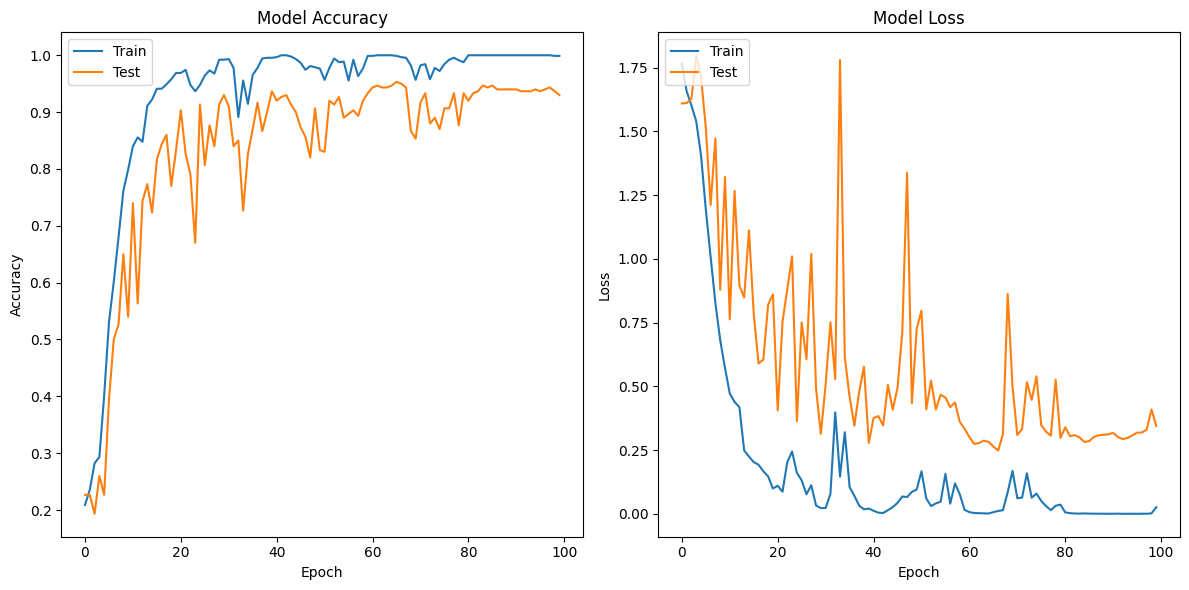

In [104]:
# Step 7: Plot training and validation accuracy and loss

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [105]:
# Directory where the test data is stored
test_data_dir = "/content/drive/MyDrive/Thesis/Data_T/clean_test"  # Update this with the actual path

_x_test = []
_y_test = []

In [106]:
# Step 1: Extract the test data and string labels (assuming labels are folder names)
for label in os.listdir(test_data_dir):
    label_dir = os.path.join(test_data_dir, label)

    # Only process if it's a folder (skip any non-folder files)
    if not os.path.isdir(label_dir):
        continue

    # Get all .wav files in the label folder
    file_names = [f for f in os.listdir(label_dir) if f.endswith(".wav")]

    # Process each audio file in the folder
    for f in tqdm(file_names, desc=f"Processing test label {label}"):
        # Extract MFCC features from the audio file
        rate, signal = wavfile.read(os.path.join(label_dir, f))
        mel = mfcc(signal, rate, nfilt=26, numcep=26, nfft=512)
        imarray = np.resize(mel, (250, 26))  # Resize or pad the MFCC features to a fixed size
        _x_test.append(imarray)

        # Append the label (string label from the folder name)
        _y_test.append(label)


Processing test label 2. Pisone Jao: 100%|██████████| 60/60 [00:01<00:00, 40.14it/s]


In [107]:
# Convert the list of features and labels into numpy arrays
x_test = np.array(_x_test, dtype="float32")
y_test = np.array(_y_test)

# Print total number of test cases
total_cases = len(x_test)
print(f"Total Number of Test Cases: {total_cases}")

# Step 2: Encode the string labels into numeric values using the same label encoder from training
y_test_encoded = label_encoder.transform(y_test)  # Convert string labels to numeric labels


Total Number of Test Cases: 300


In [108]:
# Step 3: Prepare the data for model testing
num_classes = len(label_encoder.classes_)  # Number of unique labels

# One-hot encode the test labels
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Reshape the input data to match the expected input shape for the model
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)


In [109]:
# Step 4: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)

# Print out test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 466ms/step - acc: 0.8179 - loss: 1.4332
Test Loss: 1.5438201427459717
Test Accuracy: 0.8100000023841858


In [110]:
# Step 5: Predict labels for each test example
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predictions to class indices


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


In [111]:
# Step 6: Calculate binary accuracy for each class
label_accuracy = {}

# Loop over each unique label and calculate accuracy for that label
for label_index, label_name in enumerate(label_encoder.classes_):
    # Get indices for all instances of this label
    label_indices = np.where(y_test_encoded == label_index)[0]

    # Calculate accuracy for this label
    true_labels = y_test_encoded[label_indices]  # These are class indices
    predicted_labels = y_pred_labels[label_indices]  # These are also class indices

    correct_predictions = np.sum(true_labels == predicted_labels)
    total_predictions = len(label_indices)

    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    label_accuracy[label_name] = accuracy

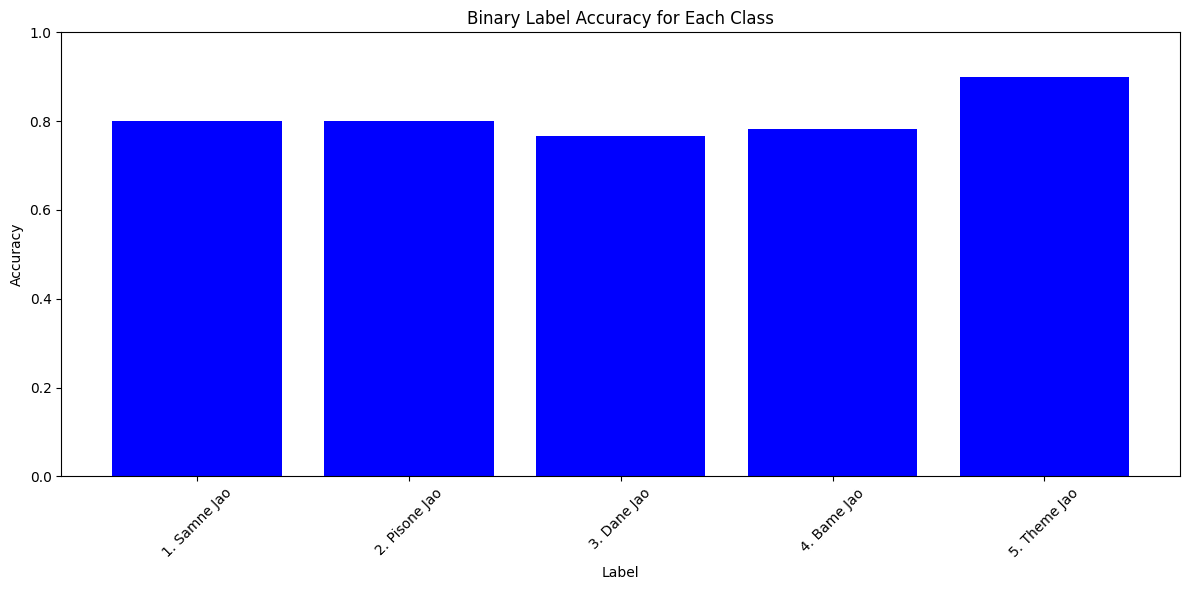

In [112]:
# Step 7: Plot the binary labeling accuracy for each class
plt.figure(figsize=(12, 6))
plt.bar(label_accuracy.keys(), label_accuracy.values(), color='b')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.title('Binary Label Accuracy for Each Class')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

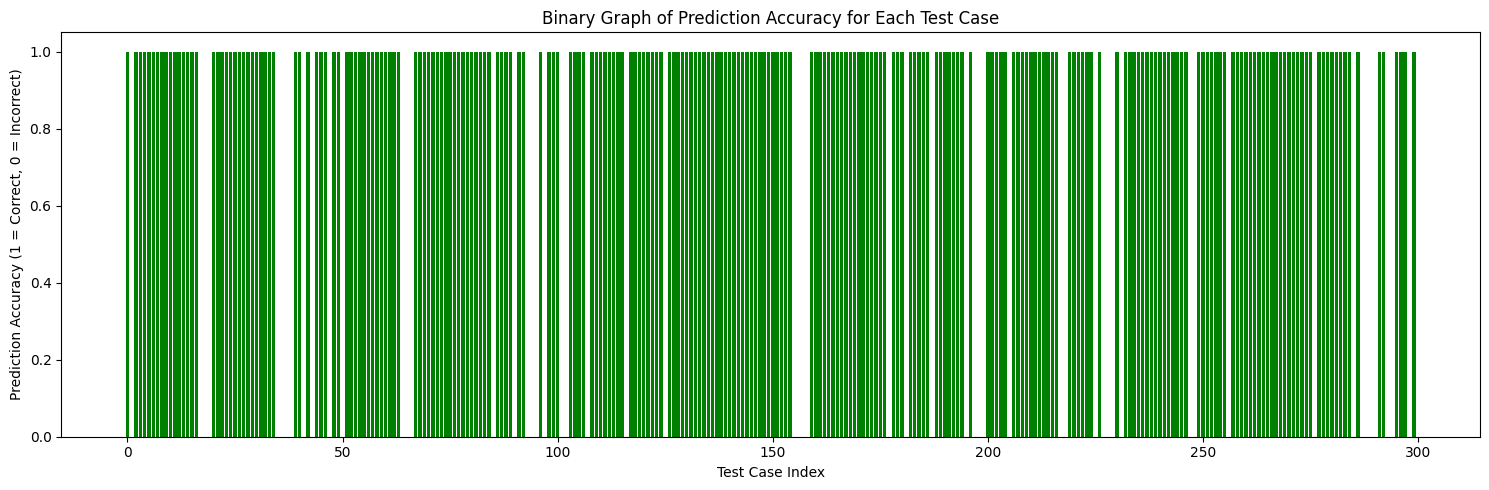

In [113]:
# Step 5: Calculate binary results for each test case
binary_results = []

# Loop over each test case
for i in range(len(y_test_encoded)):
    if y_test_encoded[i] == y_pred_labels[i]:
        binary_results.append(1)  # Correct prediction
    else:
        binary_results.append(0)  # Incorrect prediction

# Step 6: Plot the binary results for each test case
plt.figure(figsize=(15, 5))
plt.bar(range(len(binary_results)), binary_results, color=['g' if val == 1 else 'r' for val in binary_results])
plt.xlabel('Test Case Index')
plt.ylabel('Prediction Accuracy (1 = Correct, 0 = Incorrect)')
plt.title('Binary Graph of Prediction Accuracy for Each Test Case')
plt.tight_layout()
plt.show()

In [114]:
# Function to preprocess and predict the label of a single audio file
def predict_label_for_audio(audio_file_path):
    # Step 1: Load the audio file
    signal, rate = librosa.load(audio_file_path, sr=16000)

    # Step 2: Clean the audio using the envelope function
    mask = envelope(signal, rate, threshold=0.0005)
    clean_signal = signal[np.array(mask)]  # Apply the mask to clean the signal

    # Step 3: Extract MFCC features from the cleaned audio
    mel = mfcc(clean_signal, rate, nfilt=26, numcep=26, nfft=512)

    # Resize or pad MFCC to match the training input shape (250, 26)
    mfcc_features = np.resize(mel, (250, 26))

    # Step 4: Prepare the data for prediction (reshape to match model input)
    mfcc_features = mfcc_features.reshape(1, mfcc_features.shape[0], mfcc_features.shape[1], 1)

    # Step 5: Predict the label
    prediction = model.predict(mfcc_features)

    # Step 6: Decode the prediction to the label name
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])

    return predicted_label[0]

In [119]:
# Test with a new audio file
audio_file_path = "/content/drive/MyDrive/Thesis/Master Test/Theme.wav"  # Update this path to your new audio file
predicted_label = predict_label_for_audio(audio_file_path)
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted Label: 5. Theme Jao
